# Importing Imdb Movie data
In this notebook we are retrieving basic data of movies and their popularity score - all published by imdb. In order to do so, we firstly download ```title.basics.tsv.gz``` and ```title.ratings.tsv.gz``` from ```https://datasets.imdbws.com/```. Secondly, we put the downloaded data in the folder ```data```. Thirdly, we load in the newly obtained data and merge it with our given movie data set. Lastly, we analyse how more or less movie data imdb provides compared to our given data.

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [5]:
#loading in imdb's movie data
movies_imdb = pd.read_csv('./data/title.basics.tsv', sep='\t')
movies_imdb.head()

/var/folders/dk/kt0tgs8j1cb1k_hn1_h2bch80000gn/T/ipykernel_6108/3126778993.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_imdb = pd.read_csv('./data/title.basics.tsv', sep='\t')


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [6]:
#loading in imdb's movie ratings
ratings_imdb = pd.read_csv('./data/title.ratings.tsv', sep='\t')
ratings_imdb.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1925
1,tt0000002,5.8,261
2,tt0000003,6.5,1741
3,tt0000004,5.6,176
4,tt0000005,6.2,2554


In [7]:
# TODO
# add rating to movie data set 

# merge imdb movie data with given movie data in order to have imdb movie id and ratings (only keep all movies in given movie data)

# compare how many movies are in imdb and how many are in the given movie data set


In [8]:
x = []

for y in movies_imdb['genres']:

    if type(y) == str:
        x+= y.split(",")

z = np.unique(x)

In [9]:
z

array(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Experimental', 'Family',
       'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi',
       'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western', '\\N'],
      dtype='<U12')

# Major genres - Romance, Action, Comedy, Horror, Family(??)

## Secondary genres - War, sci-fi, history, animation (only voice actors)

###  interesting one could be - documentary, biography (total irrelevance to our study - so control group) - actor choice cannot be generalized based on the subject of the biography or documentary. Can be used to contrast the results or outcomes from a similar analysis used for the popular genres


In [10]:
dataset = pd.read_csv('./data/actor_movie_combi.csv', sep=',')

print(len(dataset))

698946


In [27]:
pd.options.mode.chained_assignment = None  # default='warn'

# for the sake of diversity - not taking crime and adventure reduces significantly after animation is removed
genres_major = ['Drama', "Action", "Romance","Comedy"]

# remove genres which do not have a relation to actor features
genres_remove = ["Animation", "Biography", "Documentary","Short"]


# function removes certain genres and makes additional columns for each major genre marking which category the movie belongs to 

def extract_genres(dataset, genres_major=genres_major, genres_remove=genres_remove, genre_keyword ='genres', year_keyword='startYear'):

    dataset.dropna(inplace=True)

    x = []
    a = []


    # filter genres that we are not considering = [short, documentary, biography, animation]
    dataset_filtered = dataset[~dataset[genre_keyword].str.contains('|'.join(genres_remove))]

    # to store only movies and actors that have worked in the major genres
    movies_major = dataset_filtered[dataset_filtered[genre_keyword].str.contains('|'.join(genres_major))]

    for i in genres_major:

        movies_major[i] = movies_major[genre_keyword].apply(lambda x: 1 if i in x else 0)

    movies_major.sort_values(by =year_keyword, ascending=True)

    for y in movies_major[genre_keyword]:

        if type(y) == str:
            x+= y.split(",")

    genres_all, counts = np.unique(x, return_counts=True)

    genre_df = pd.DataFrame(list(zip(genres_all, counts)), columns=["genre", "count"])

        
    genre_df.sort_values('count',inplace=True, ascending = False)
    genre_df.reset_index(drop=True,inplace=True)
    genre_df.set_index('genre').plot(kind='bar', figsize=(13,4))

    return genres_all, counts, movies_major


# fig = plt.figure(1, figsize=(13,4))

# plt.bar(genres_all, counts)

# plt.xticks(genres_all, rotation = 90)

# plt.show()

# print(genre_df)

['Action' 'Adult' 'Adventure' 'Comedy' 'Crime' 'Drama' 'Family' 'Fantasy'
 'Film-Noir' 'Game-Show' 'History' 'Horror' 'Music' 'Musical' 'Mystery'
 'News' 'Reality-TV' 'Romance' 'Sci-Fi' 'Sport' 'Talk-Show' 'Thriller'
 'War' 'Western']
468557
698946


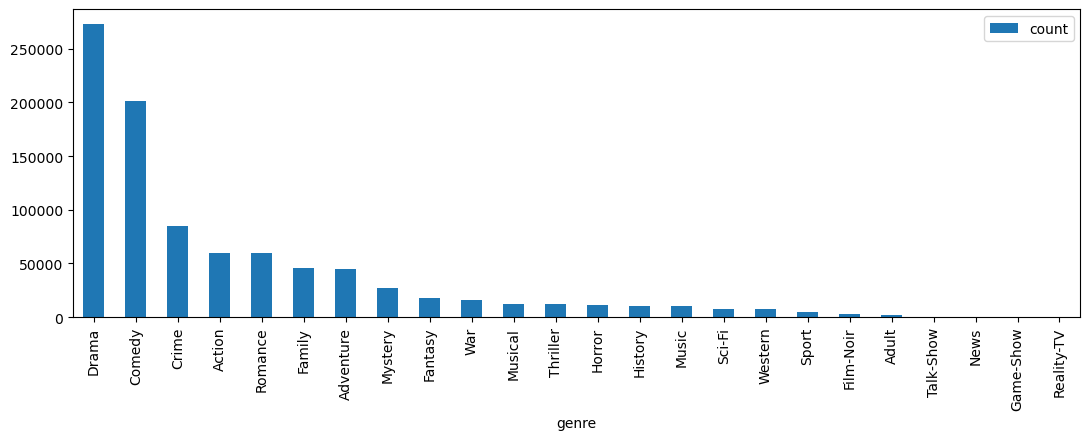

In [12]:

genres_all, counts, movies_major = extract_genres(dataset=dataset)

print(genres_all)

print(len(movies_major))
print(len(dataset))


In [13]:
movies_major.to_csv("./data/major_genre_movies.csv", index=False)

## Time to make an actor profile

# features such as experience, age, genre diversity

# how to justify an ideal actor profile - average rating around these features and also give an example of a famous actor with such a background

In [14]:
movies_major[movies_major["primaryName"].str.contains("Marlon Brando")].sort_values(by="exp_so_far", ascending=False).head()

,Unnamed: 0,tconst,ordering,nconst,gender,primaryName,birthYear,deathYear,startYear,genres,deatYear,age_at_movie_start,averageRating,numVotes,exp_so_far,Drama,Action,Romance,Comedy
614435,7043498,tt1295453,1,nm0000008,0,Marlon Brando,1924.0,2004,1977.0,"Crime,Drama,Thriller",2004.0,53.0,9.2,172.0,47,1,0,0,0
614432,7043491,tt1295452,1,nm0000008,0,Marlon Brando,1924.0,2004,1977.0,"Crime,Drama,Thriller",2004.0,53.0,9.3,162.0,46,1,0,0,0
614429,7043475,tt1295451,1,nm0000008,0,Marlon Brando,1924.0,2004,1977.0,"Crime,Drama,Thriller",2004.0,53.0,9.3,163.0,45,1,0,0,0
614426,7043460,tt1295450,1,nm0000008,0,Marlon Brando,1924.0,2004,1977.0,"Crime,Drama,Thriller",2004.0,53.0,9.4,176.0,44,1,0,0,0
556574,2857674,tt0839995,3,nm0000008,0,Marlon Brando,1924.0,2004,1980.0,"Action,Adventure,Romance",2004.0,56.0,7.6,17306.0,42,0,1,1,0


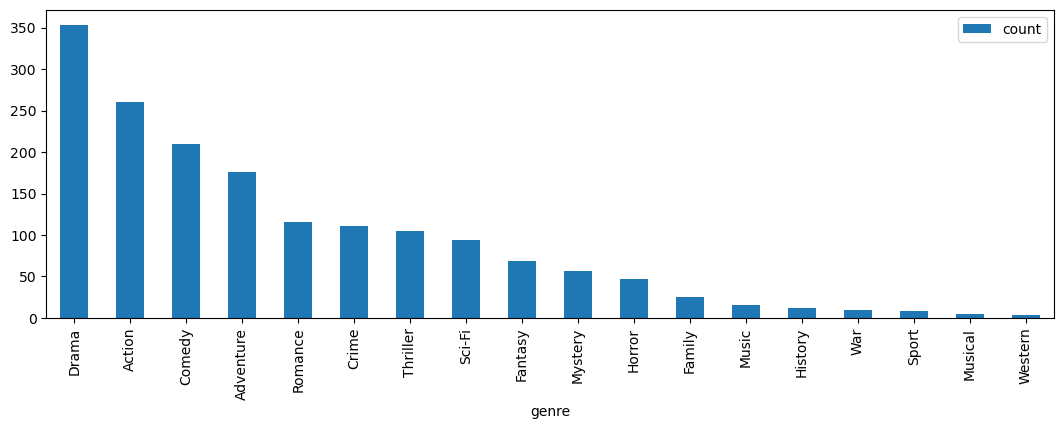

In [28]:
movies_popular = pd.read_csv("./data/IMDB-Movie-Data.csv")

genres_popular, counts, mp = extract_genres(movies_popular, genre_keyword='Genre', year_keyword='Year')

In [23]:
movies_popular['Rating'].mean()

6.723200000000003

In [24]:
movies_popular

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


movies_popular